In [312]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [313]:
df = pd.read_csv(r"C:\Users\ariha\OneDrive - IIT Kanpur\Desktop\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [314]:
df.shape

(13320, 9)

In [315]:
df['size'].unique() #not using this column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [316]:
x = df[['total_sqft','bath','balcony']]
y = df.price

In [317]:
x.head()

,total_sqft,bath,balcony
0,1056,2.0,1.0
1,2600,5.0,3.0
2,1440,2.0,3.0
3,1521,3.0,1.0
4,1200,2.0,1.0


In [318]:
x.bath.isnull().sum().sum(),x.balcony.isnull().sum().sum()

(73, 609)

First we have to set values of total_sqft who are like lower_lim-upper_lim to (upper_lim+lower_lim)/2.

In [319]:
def convert_to_mid_value(range_str):
    if isinstance(range_str, str):
        start, end = map(float, range_str.split('-'))
    elif isinstance(range_str, float):
        start = end = range_str
    else:
        raise ValueError("Invalid range format")
    return (start + end) / 2

In [320]:
x.total_sqft.dtype

dtype('O')

In [321]:
range_rows = df[df['total_sqft'].str.contains('-')]
rrr = range_rows.index
x['total_sqft'].loc[rrr] = x['total_sqft'].loc[rrr].apply(lambda x:convert_to_mid_value(x))

C:\Users\ariha\AppData\Local\Temp\ipykernel_34672\2889984426.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x['total_sqft'].loc[rrr] = x['total_sqft'].loc[rrr].apply(lambda x:convert_to_mid_value(x))
C:\Users\ariha\AppData\Local\Temp\ip

In [322]:
x.total_sqft.dtype

dtype('O')

There are some data like xxxx.xxSq. Meter. So fix this.

In [323]:
import re
def extract_numeric(s):
    if isinstance(s, str):
        match = re.search(r'(\d+(\.\d+)?)', s)
        if match:
            return float(match.group(1))
        else:
            return None
    elif isinstance(s, float):
        return s
    else:
        return None

In [324]:
x['total_sqft'] = x['total_sqft'].apply(lambda x: extract_numeric(x))

C:\Users\ariha\AppData\Local\Temp\ipykernel_34672\2119429519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['total_sqft'] = x['total_sqft'].apply(lambda x: extract_numeric(x))


In [325]:
x

,total_sqft,bath,balcony
0,1056.0,2.0,1.0
1,2600.0,5.0,3.0
2,1440.0,2.0,3.0
3,1521.0,3.0,1.0
4,1200.0,2.0,1.0
...,...,...,...
13315,3453.0,4.0,0.0
13316,3600.0,5.0,NaN
13317,1141.0,2.0,1.0
13318,4689.0,4.0,1.0


As we have null values in bath as well as balcony, i think we should first assign those values using total_sqft.
But as their number is very small we will drop them.

In [326]:
null_rows = x.loc[x['bath'].isnull() | x['balcony'].isnull()]
rows = null_rows.index
print(null_rows)

       total_sqft  bath  balcony
6          2732.0   4.0      NaN
7          3300.0   4.0      NaN
9          1020.0   6.0      NaN
34         1925.0   3.0      NaN
40         1296.0   2.0      NaN
...           ...   ...      ...
13277      1400.0   7.0      NaN
13279      1200.0   5.0      NaN
13306      1200.0   5.0      NaN
13309      1675.0   3.0      NaN
13316      3600.0   5.0      NaN

[609 rows x 3 columns]


In [327]:
x=x.drop(rows, axis='index')
y=y.drop(rows, axis='index')
x=x.reset_index()
x=x.drop('index', axis='columns')

////MOVING ON

In [328]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [334]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_use = sx.fit_transform(x)
y_use = sy.fit_transform(y.values.reshape(x.shape[0],1))


In [335]:
x_use

array([[0.02018328, 0.02564103, 0.33333333],
       [0.04972164, 0.1025641 , 1.        ],
       [0.02752961, 0.02564103, 1.        ],
       ...,
       [0.02180942, 0.02564103, 0.33333333],
       [0.08968644, 0.07692308, 0.33333333],
       [0.01050296, 0.        , 0.33333333]])

In [341]:
x_use.shape

(12711, 3)

In [348]:
y_use = y_use.reshape(1,-1)
y_use

array([[0.01069904, 0.03856749, 0.01859504, ..., 0.01790634, 0.16528926,
        0.00309917]])

IMPLEMENTING BATCH GRADIENT DESCENT

In [418]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.05):

    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))# MSE (Mean Squared Error)
        
        if i%1==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [419]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_use,y_use.reshape(y_use.shape[1],),500)

In [420]:
w,b,cost

(array([0.97821234, 0.94862525, 0.02876818]),
 -0.05037359875257213,
 0.0017141635583966255)

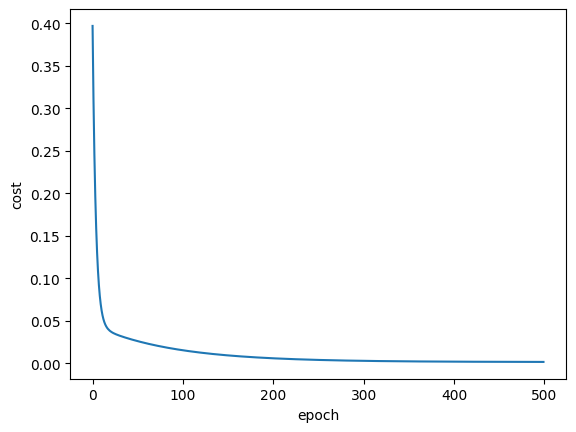

In [421]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

IMPLEMENTING STOCHASTIC GRADIENT DESCENT

In [379]:
import random

In [385]:
def SGD(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [411]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(x_use,y_use.reshape(y_use.shape[1],),10000000)

In [412]:
w_sgd, b_sgd, cost_sgd

(array([0.98403381, 0.96886857, 0.29433285]),
 -0.20015335024689437,
 0.039724966538159)

In [417]:
w,b, cost

(array([0.98504147, 0.97287847, 0.41411103]),
 -0.26747366056417227,
 0.015481895011373759)

In [414]:
# import numpy as np
# import numpy as np
# from scipy.interpolate import make_interp_spline
# import matplotlib.pyplot as plt 
# plt.xlabel("epoch")
# plt.ylabel("cost")
# x=np.array(epoch_list_sgd)
# y=np.array(cost_list_sgd)
# X_Y_Spline = make_interp_spline(x,y)

# X_ = np.linspace(x.min(), y.max(), 500)
# Y_ = X_Y_Spline(X_)

# plt.plot(X_,Y_)

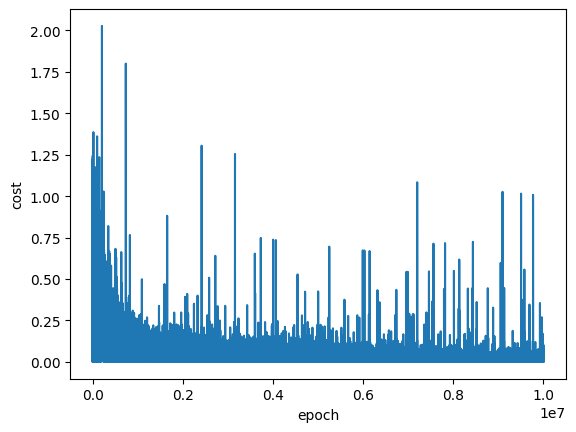

In [415]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)